<a href="https://colab.research.google.com/github/KUSHx123/Heart-Disease-Prediction-RF-/blob/main/Heart_Disease_Prediction(RF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [ ]:
 # loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,526
0,499


1 --> Defective Heart

0 --> Healthy Heart

<ipython-input-42-23734f5db751>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= heart_data["target"], palette= cols)


<Axes: xlabel='target', ylabel='count'>

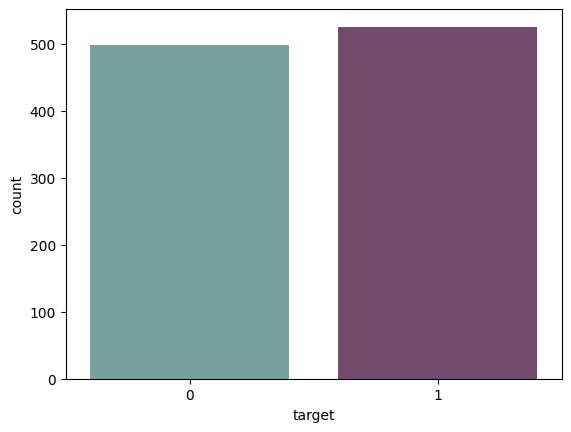

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= heart_data["target"], palette= cols)

Distribution of Age:

Text(0.5, 1.0, 'Distribution Of Age')

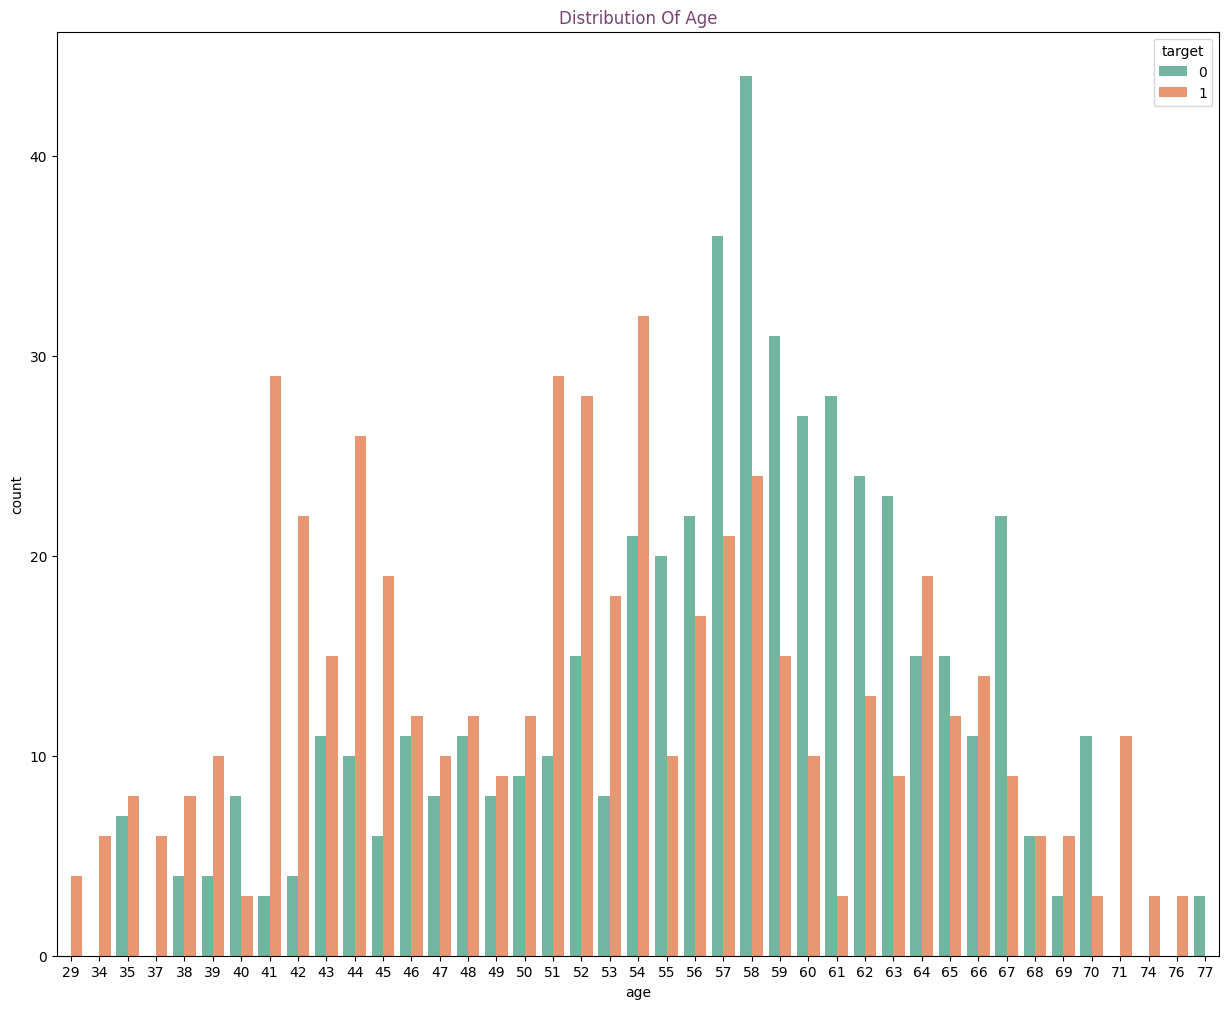

In [ ]:
plt.figure(figsize=(15,12))
# Define the color palette you want to use
# For example, using a built-in seaborn palette:
cols = "Set2"
# Or define your custom colors:
# cols = ["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]

Days_of_week=sns.countplot(x=heart_data['age'],data=heart_data, hue ="target",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

Model Training

RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
# --- define the missing function ---
def fit_ml_models(algo, parameter, model_name):
  # --- instantiate GridSearchCV ---
  grid = GridSearchCV(algo, parameter, cv=5, scoring='accuracy')

  # --- fit the model ---
  grid.fit(X_train, y_train)

  # --- predictions on train set ---
  y_pred_train = grid.predict(X_train)

  # --- predictions on test set ---
  y_pred_test = grid.predict(X_test)

  # --- accuracy score on train set ---
  acc_score_train = accuracy_score(y_train, y_pred_train)

  # --- accuracy score on test set ---
  acc_score_test = accuracy_score(y_test, y_pred_test)

  # --- best score ---
  best_score = grid.best_score_

  # --- return the values ---
  return acc_score_train, acc_score_test, best_score

Model Evaluation

Accuracy Score

In [ ]:
# --- instantiate the model ---
model = RandomForestClassifier()

# --- fit the model ---
model.fit(X_train, Y_train)

# --- accuracy on training data ---
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Calculate and print the classification report:

In [ ]:
# Assuming 'model' is your trained RandomForestClassifier
y_pred = model.predict(X_test)  # Predictions on the test set
print(classification_report(Y_test, y_pred))  # Print the report

In [ ]:
precision, recall, f1, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')  # or 'binary' for single class
print(f"Precision: {precision:.2f}")  # This line and the following two should be aligned with the first statement
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

In [ ]:
!pip install matplotlib seaborn pandas

Feature Selection

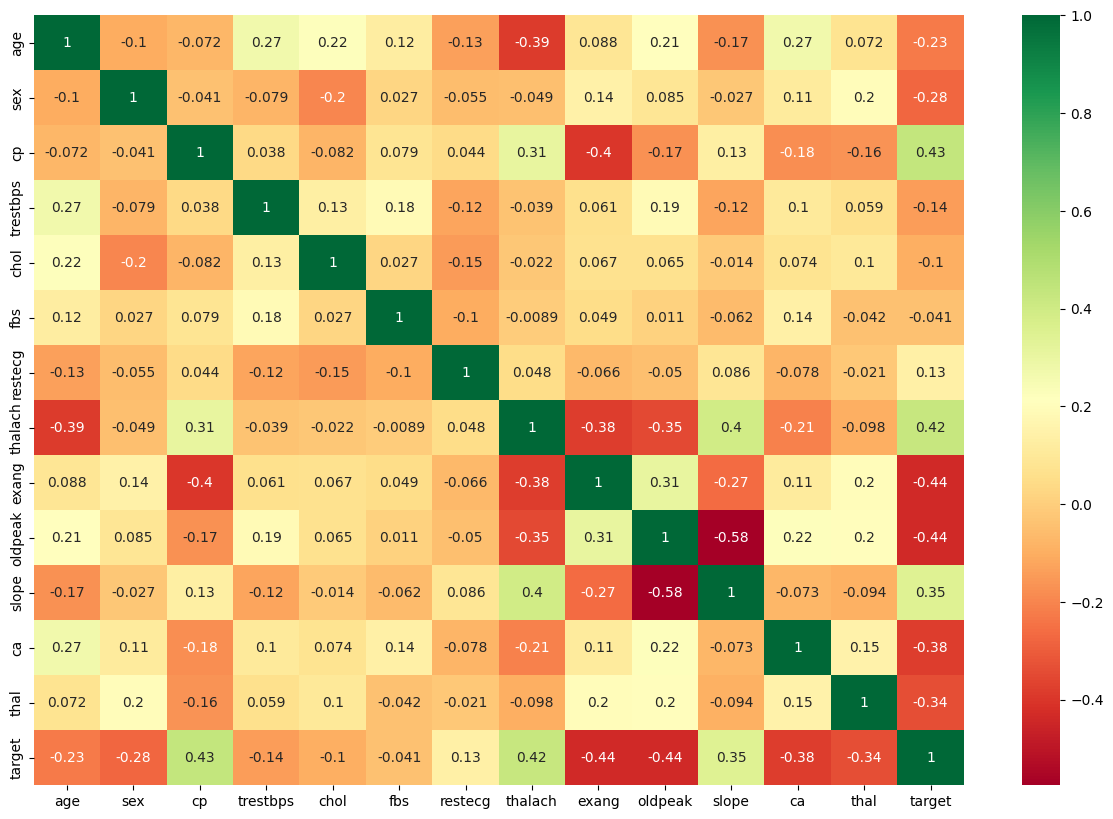

In [ ]:
#get correlations of each features in dataset
corrmat = heart_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(heart_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Feature Importance Plot:

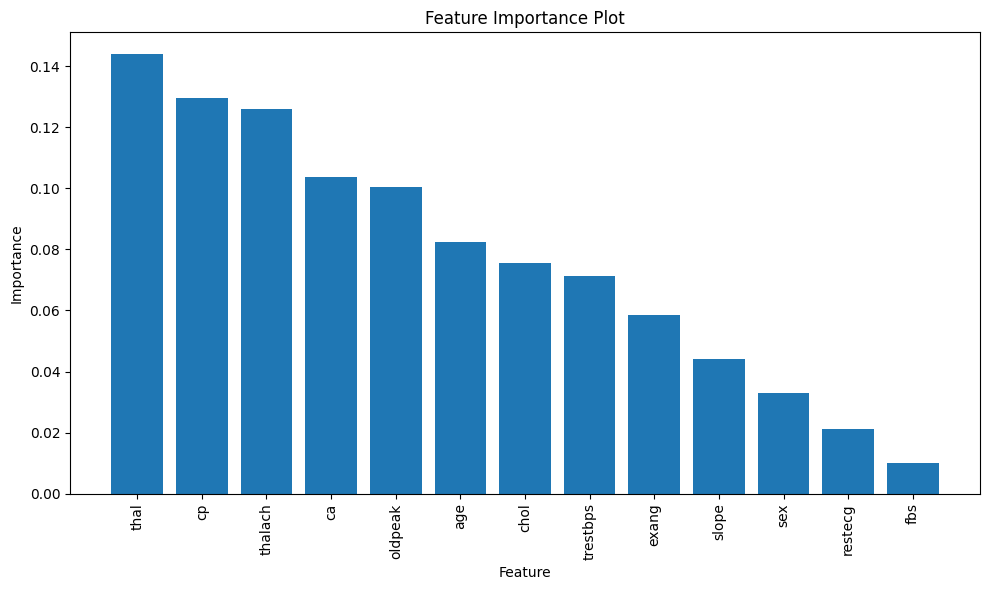

In [ ]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns  # Assuming X is your feature dataframe

# Create a dataframe for plotting
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.tight_layout()
plt.show()

Confusion Matrix Plot:

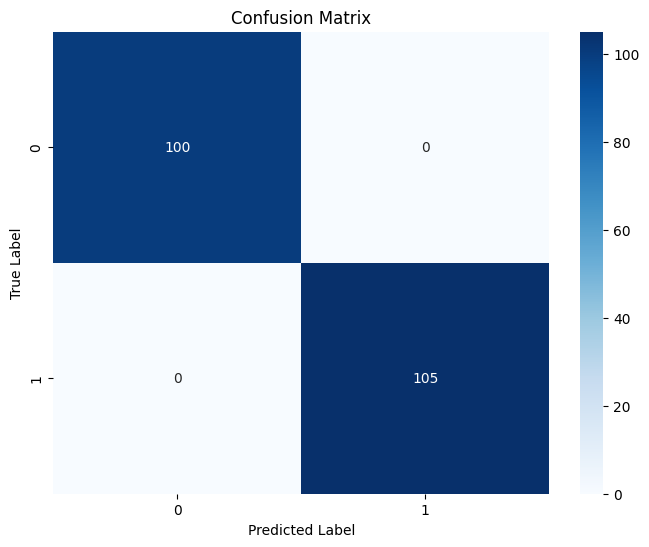

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC Curve (for binary classification):

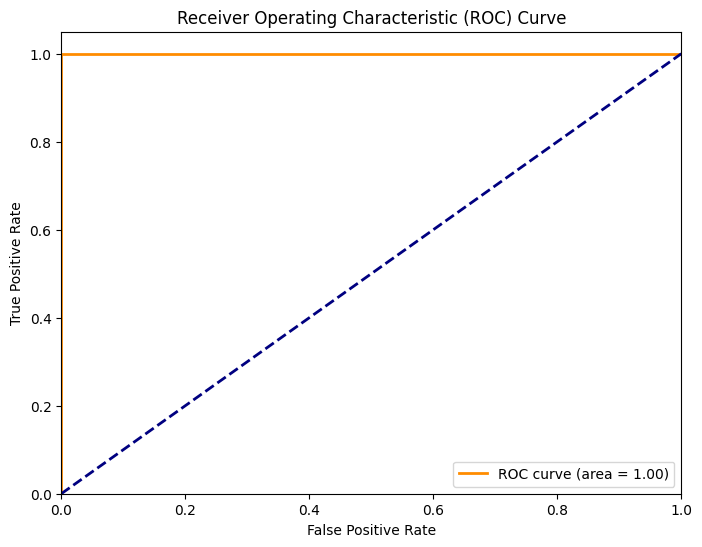

In [ ]:
# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Building a Predictive System

In [ ]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
